In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2023-04-27 04:47:31.055853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
wholedata_num = pd.read_csv('./core_database/prepared_dimension_reduction_data.csv')
wholedata = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')

/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_6707/2704794778.py:4: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  wholedata = pd.read_csv('./core_database/destress_wholedata_labelled_as_rd.csv')


In [11]:
wholedata_num

,ss_prop_hbonded_turn,ss_prop_bend,ss_prop_loop,hydrophobic_fitness,isoelectric_point,rosetta_total,rosetta_fa_rep,rosetta_fa_intra_rep,rosetta_lk_ball_wtd,rosetta_fa_intra_sol_xover4,rosetta_hbond_lr_bb,rosetta_hbond_sr_bb,rosetta_hbond_sc,rosetta_pro_close,aggrescan3d_avg_value,aggrescan3d_max_value
0,0.078326,0.043072,0.130856,0.774260,0.281818,0.000778,0.000145,0.001423,0.449610,0.188793,0.972059,0.365702,0.786345,0.000005,0.415872,0.250498
1,0.160941,0.090830,0.197196,0.782900,0.454545,0.000716,0.000365,0.001495,0.504286,0.176997,0.750959,0.639599,0.854410,0.000025,0.420116,0.256579
2,0.137361,0.135603,0.282071,0.785531,0.627273,0.001325,0.000457,0.001340,0.517770,0.200280,0.807810,0.775731,0.797611,0.000095,0.421510,0.245950
3,0.169535,0.223367,0.268521,0.792935,0.227273,0.000753,0.000323,0.001204,0.552909,0.165317,0.512873,0.906799,0.798564,0.000015,0.422634,0.243883
4,0.169224,0.097822,0.192301,0.785478,0.636364,0.001645,0.000629,0.001953,0.505068,0.172902,0.904480,0.656358,0.850859,0.000177,0.421049,0.253140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692704,0.216000,0.102941,0.202214,0.769653,0.736364,0.000721,0.000213,0.001149,0.561189,0.151148,0.650693,0.756557,0.911735,0.000042,0.415555,0.247554
692705,0.133436,0.051102,0.380074,0.786272,0.318182,0.002706,0.000135,0.000941,0.535344,0.149228,0.989312,0.599050,0.956909,0.000357,0.416427,0.252496
692706,0.131765,0.105729,0.298203,0.793801,0.418182,0.002162,0.000163,0.001110,0.514162,0.144614,0.953127,0.641172,0.970172,0.000292,0.421481,0.261854
692707,0.090353,0.040369,0.114555,0.789142,0.563636,0.000783,0.000209,0.001163,0.522053,0.118926,0.975290,0.334409,0.956228,0.000032,0.425462,0.262762


autoencoder without loop

In [14]:
wholedata_num_noloop = wholedata_num.copy()
wholedata_num_noloop.drop('ss_prop_loop', axis=1,inplace=True)
wholedata_num_noloop

,ss_prop_hbonded_turn,ss_prop_bend,hydrophobic_fitness,isoelectric_point,rosetta_total,rosetta_fa_rep,rosetta_fa_intra_rep,rosetta_lk_ball_wtd,rosetta_fa_intra_sol_xover4,rosetta_hbond_lr_bb,rosetta_hbond_sr_bb,rosetta_hbond_sc,rosetta_pro_close,aggrescan3d_avg_value,aggrescan3d_max_value
0,0.078326,0.043072,0.774260,0.281818,0.000778,0.000145,0.001423,0.449610,0.188793,0.972059,0.365702,0.786345,0.000005,0.415872,0.250498
1,0.160941,0.090830,0.782900,0.454545,0.000716,0.000365,0.001495,0.504286,0.176997,0.750959,0.639599,0.854410,0.000025,0.420116,0.256579
2,0.137361,0.135603,0.785531,0.627273,0.001325,0.000457,0.001340,0.517770,0.200280,0.807810,0.775731,0.797611,0.000095,0.421510,0.245950
3,0.169535,0.223367,0.792935,0.227273,0.000753,0.000323,0.001204,0.552909,0.165317,0.512873,0.906799,0.798564,0.000015,0.422634,0.243883
4,0.169224,0.097822,0.785478,0.636364,0.001645,0.000629,0.001953,0.505068,0.172902,0.904480,0.656358,0.850859,0.000177,0.421049,0.253140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692704,0.216000,0.102941,0.769653,0.736364,0.000721,0.000213,0.001149,0.561189,0.151148,0.650693,0.756557,0.911735,0.000042,0.415555,0.247554
692705,0.133436,0.051102,0.786272,0.318182,0.002706,0.000135,0.000941,0.535344,0.149228,0.989312,0.599050,0.956909,0.000357,0.416427,0.252496
692706,0.131765,0.105729,0.793801,0.418182,0.002162,0.000163,0.001110,0.514162,0.144614,0.953127,0.641172,0.970172,0.000292,0.421481,0.261854
692707,0.090353,0.040369,0.789142,0.563636,0.000783,0.000209,0.001163,0.522053,0.118926,0.975290,0.334409,0.956228,0.000032,0.425462,0.262762


In [25]:
# Normalize the data
scaled_data_noloop = MinMaxScaler().fit_transform(wholedata_num_noloop)

# Split the data into train and test sets
X_train_noloop, X_test_noloop = train_test_split(scaled_data_noloop, test_size=0.2, random_state=42)

# Define the autoencoder's architecture
input_dim = X_train_noloop.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(32, activation='relu')(input_layer)
encoder_layer2 = Dense(16, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='linear')(encoder_layer2)

encoder = Model(input_layer, encoder_layer3)

decoder_layer1 = Dense(16, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(32, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

autoencoder = Model(input_layer, decoder_layer3)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_noloop, X_train_noloop, epochs=200, batch_size=256, shuffle=True, validation_data=(X_test_noloop, X_test_noloop), verbose=1)

# Use the encoder to obtain the reduced dataset
reduced_data_noloop = encoder.predict(scaled_data_noloop)

reduced_df_noloop = pd.DataFrame(reduced_data_noloop, columns=["dim1", "dim2"])  # or "dim3" if using 3 dimensions



Epoch 1/200
2165/2165 [==============================] - 2s 780us/step - loss: 0.0020 - val_loss: 0.0010
Epoch 2/200
2165/2165 [==============================] - 2s 862us/step - loss: 0.0010 - val_loss: 9.5828e-04
Epoch 3/200
2165/2165 [==============================] - 2s 876us/step - loss: 9.4329e-04 - val_loss: 9.0363e-04
Epoch 4/200
2165/2165 [==============================] - 2s 767us/step - loss: 8.8102e-04 - val_loss: 9.7063e-04
Epoch 5/200
2165/2165 [==============================] - 1s 637us/step - loss: 8.5737e-04 - val_loss: 7.9931e-04
Epoch 6/200
2165/2165 [==============================] - 2s 702us/step - loss: 8.4190e-04 - val_loss: 7.8309e-04
Epoch 7/200
2165/2165 [==============================] - 1s 686us/step - loss: 8.4598e-04 - val_loss: 7.9057e-04
Epoch 8/200
2165/2165 [==============================] - 1s 653us/step - loss: 8.6164e-04 - val_loss: 7.8591e-04
Epoch 9/200
2165/2165 [==============================] - 1s 660us/step - loss: 8.4204e-04 - val_loss: 7.7795

2165/2165 [==============================] - 2s 755us/step - loss: 8.9550e-04 - val_loss: 7.7738e-04
Epoch 74/200
2165/2165 [==============================] - 1s 655us/step - loss: 8.2974e-04 - val_loss: 7.5465e-04
Epoch 75/200
2165/2165 [==============================] - 2s 721us/step - loss: 8.4224e-04 - val_loss: 7.6966e-04
Epoch 76/200
2165/2165 [==============================] - 1s 647us/step - loss: 8.4876e-04 - val_loss: 0.0010
Epoch 77/200
2165/2165 [==============================] - 2s 763us/step - loss: 8.0642e-04 - val_loss: 7.5282e-04
Epoch 78/200
2165/2165 [==============================] - 1s 683us/step - loss: 8.2852e-04 - val_loss: 8.5583e-04
Epoch 79/200
2165/2165 [==============================] - 1s 636us/step - loss: 8.3960e-04 - val_loss: 7.6038e-04
Epoch 80/200
2165/2165 [==============================] - 1s 634us/step - loss: 8.4405e-04 - val_loss: 8.1184e-04
Epoch 81/200
2165/2165 [==============================] - 1s 684us/step - loss: 8.4632e-04 - val_loss: 0.

2165/2165 [==============================] - 1s 635us/step - loss: 7.8816e-04 - val_loss: 7.4267e-04
Epoch 145/200
2165/2165 [==============================] - 1s 639us/step - loss: 8.3075e-04 - val_loss: 8.8485e-04
Epoch 146/200
2165/2165 [==============================] - 1s 637us/step - loss: 8.3631e-04 - val_loss: 0.0012
Epoch 147/200
2165/2165 [==============================] - 1s 669us/step - loss: 9.7494e-04 - val_loss: 9.6663e-04
Epoch 148/200
2165/2165 [==============================] - 1s 633us/step - loss: 9.4429e-04 - val_loss: 9.3365e-04
Epoch 149/200
2165/2165 [==============================] - 1s 643us/step - loss: 9.3643e-04 - val_loss: 9.2458e-04
Epoch 150/200
2165/2165 [==============================] - 1s 640us/step - loss: 9.2479e-04 - val_loss: 9.0246e-04
Epoch 151/200
2165/2165 [==============================] - 1s 635us/step - loss: 9.2013e-04 - val_loss: 9.0562e-04
Epoch 152/200
2165/2165 [==============================] - 1s 634us/step - loss: 9.1780e-04 - val_

/var/folders/jq/ph87kw_d695bbwx2yc22bgxh0000gn/T/ipykernel_6707/3440807464.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig("Autoencoder analysis without loops.png", dpi=300)
/Users/Zachary/opt/anaconda3/envs/autoencoder/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/Zachary/opt/anaconda3/envs/autoencoder/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


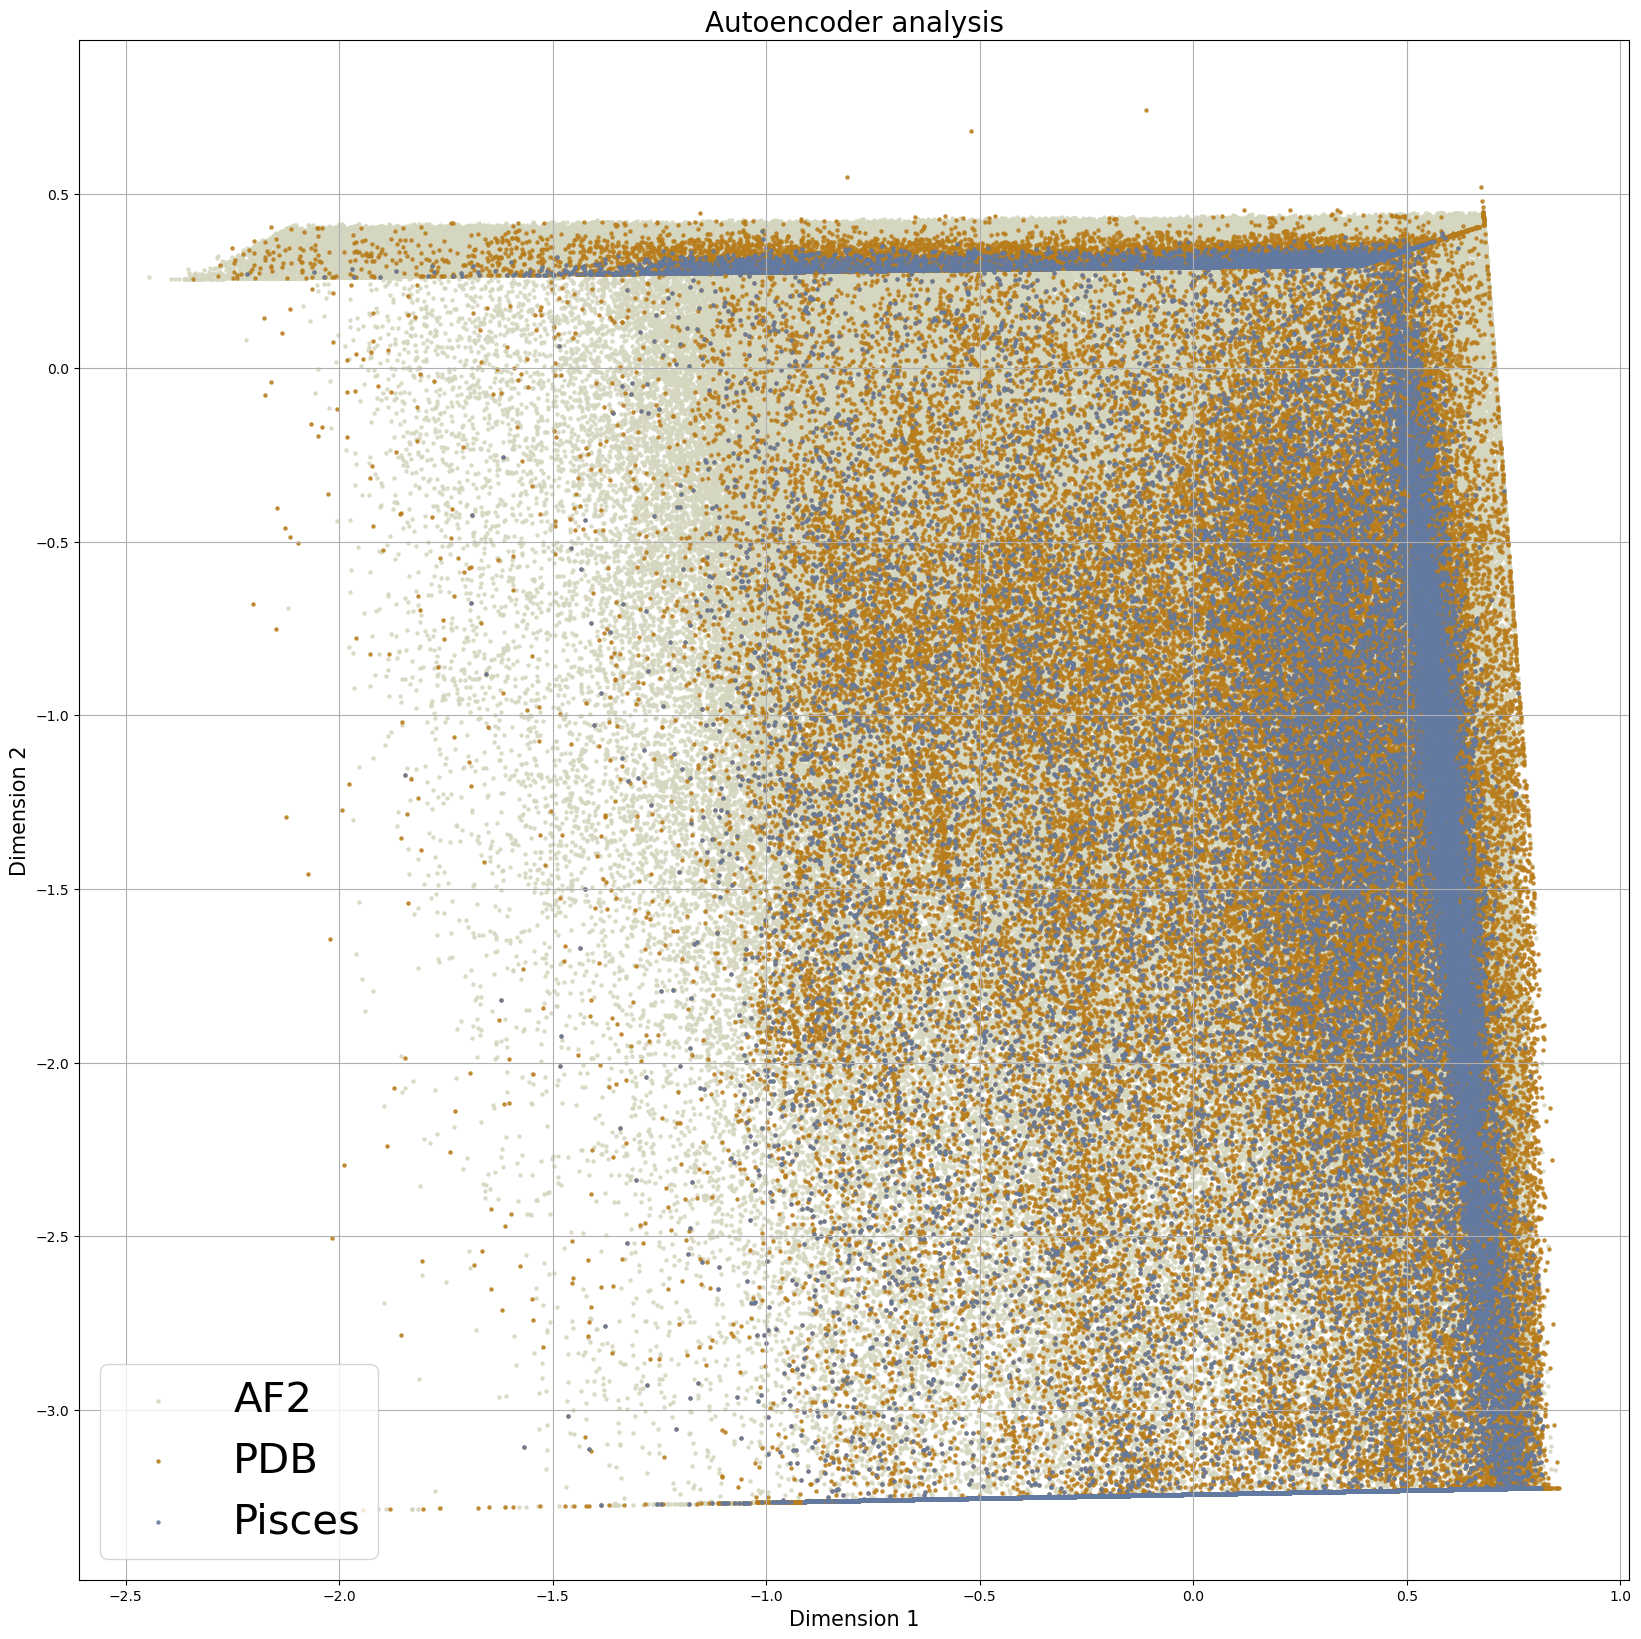

In [28]:
labels =wholedata.loc[:,['label_1','label_2']]
labels.reset_index(drop=True, inplace=True)
finalDf_noloop = pd.concat([reduced_df_noloop, labels], axis = 1)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('Autoencoder analysis', fontsize = 20)
#ax.set_xticks(np.arange(-120, 120, 10))
#ax.set_yticks(np.arange(-120, 120, 10))

targets = [ 'AF2','PDB', 'Pisces']
colors = [ '#D5D6BF', '#B87C1B','#6279A2']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf_noloop['label_1'] == target) | (finalDf_noloop['label_2'] == target)
    ax.scatter(finalDf_noloop.loc[indicesToKeep, 'dim1' ]
               , finalDf_noloop.loc[indicesToKeep, 'dim2']
               , c = color
               , s = 5
               , alpha=0.8)
#ax.set_xticks(np.arange(-2.5, 10, 0.2))
#ax.set_yticks(np.arange(-0.5, 10, 0.2))

ax.legend(targets,prop={'size': 30})
ax.grid()
fig.savefig("Autoencoder analysis without loops.png", dpi=300)

autoencoder with loop

In [7]:
# Normalize the data
scaled_data = MinMaxScaler().fit_transform(wholedata_num)

# Split the data into train and test sets
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

In [24]:
# Define the autoencoder's architecture
input_dim = X_train.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder_layer1 = Dense(32, activation='relu')(input_layer)
encoder_layer2 = Dense(16, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='linear')(encoder_layer2)

encoder = Model(input_layer, encoder_layer3)

decoder_layer1 = Dense(16, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(32, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

autoencoder = Model(input_layer, decoder_layer3)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=200, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=1)

# Use the encoder to obtain the reduced dataset
reduced_data = encoder.predict(scaled_data)

reduced_df = pd.DataFrame(reduced_data, columns=["dim1", "dim2"])  # or "dim3" if using 3 dimensions
reduced_df.to_csv("./reduced_data/Autoencoder_reduced_data.csv")
reduced_df.describe()

Epoch 1/200
2165/2165 [==============================] - 2s 689us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 2/200
2165/2165 [==============================] - 1s 635us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/200
2165/2165 [==============================] - 1s 636us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/200
2165/2165 [==============================] - 1s 638us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/200
2165/2165 [==============================] - 1s 641us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/200
2165/2165 [==============================] - 1s 656us/step - loss: 0.0010 - val_loss: 9.8735e-04
Epoch 7/200
2165/2165 [==============================] - 1s 642us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/200
2165/2165 [==============================] - 1s 637us/step - loss: 0.0010 - val_loss: 9.8611e-04
Epoch 9/200
2165/2165 [==============================] - 1s 644us/step - loss: 9.9014e-04 - val_loss: 0.0014
Epoch 10/200
2165/2165 [===================

2165/2165 [==============================] - 1s 627us/step - loss: 9.3097e-04 - val_loss: 9.0458e-04
Epoch 75/200
2165/2165 [==============================] - 1s 635us/step - loss: 9.5081e-04 - val_loss: 9.1131e-04
Epoch 76/200
2165/2165 [==============================] - 1s 632us/step - loss: 9.4031e-04 - val_loss: 8.9971e-04
Epoch 77/200
2165/2165 [==============================] - 1s 633us/step - loss: 9.2849e-04 - val_loss: 9.1526e-04
Epoch 78/200
2165/2165 [==============================] - 1s 632us/step - loss: 9.2275e-04 - val_loss: 9.3139e-04
Epoch 79/200
2165/2165 [==============================] - 1s 634us/step - loss: 9.3268e-04 - val_loss: 9.1400e-04
Epoch 80/200
2165/2165 [==============================] - 1s 633us/step - loss: 9.2134e-04 - val_loss: 9.0940e-04
Epoch 81/200
2165/2165 [==============================] - 1s 632us/step - loss: 9.3543e-04 - val_loss: 9.0219e-04
Epoch 82/200
2165/2165 [==============================] - 1s 631us/step - loss: 9.4240e-04 - val_loss

2165/2165 [==============================] - 1s 656us/step - loss: 9.3161e-04 - val_loss: 9.0083e-04
Epoch 146/200
2165/2165 [==============================] - 1s 636us/step - loss: 9.1161e-04 - val_loss: 8.9008e-04
Epoch 147/200
2165/2165 [==============================] - 1s 653us/step - loss: 9.1762e-04 - val_loss: 8.8927e-04
Epoch 148/200
2165/2165 [==============================] - 1s 687us/step - loss: 9.4540e-04 - val_loss: 0.0010
Epoch 149/200
2165/2165 [==============================] - 2s 703us/step - loss: 9.5195e-04 - val_loss: 8.9072e-04
Epoch 150/200
2165/2165 [==============================] - 2s 710us/step - loss: 9.3102e-04 - val_loss: 8.9049e-04
Epoch 151/200
2165/2165 [==============================] - 1s 663us/step - loss: 9.2283e-04 - val_loss: 9.3396e-04
Epoch 152/200
2165/2165 [==============================] - 2s 708us/step - loss: 9.2644e-04 - val_loss: 8.9890e-04
Epoch 153/200
2165/2165 [==============================] - 1s 683us/step - loss: 9.1760e-04 - val_

,dim1,dim2
count,692709.000000,692709.000000
mean,1.898094,2.024430
std,5.811980,5.815361
min,-1.843819,-0.918012
25%,-0.161124,-0.349299
50%,-0.044162,-0.159022
75%,0.083531,0.147484
max,173.294998,177.003586


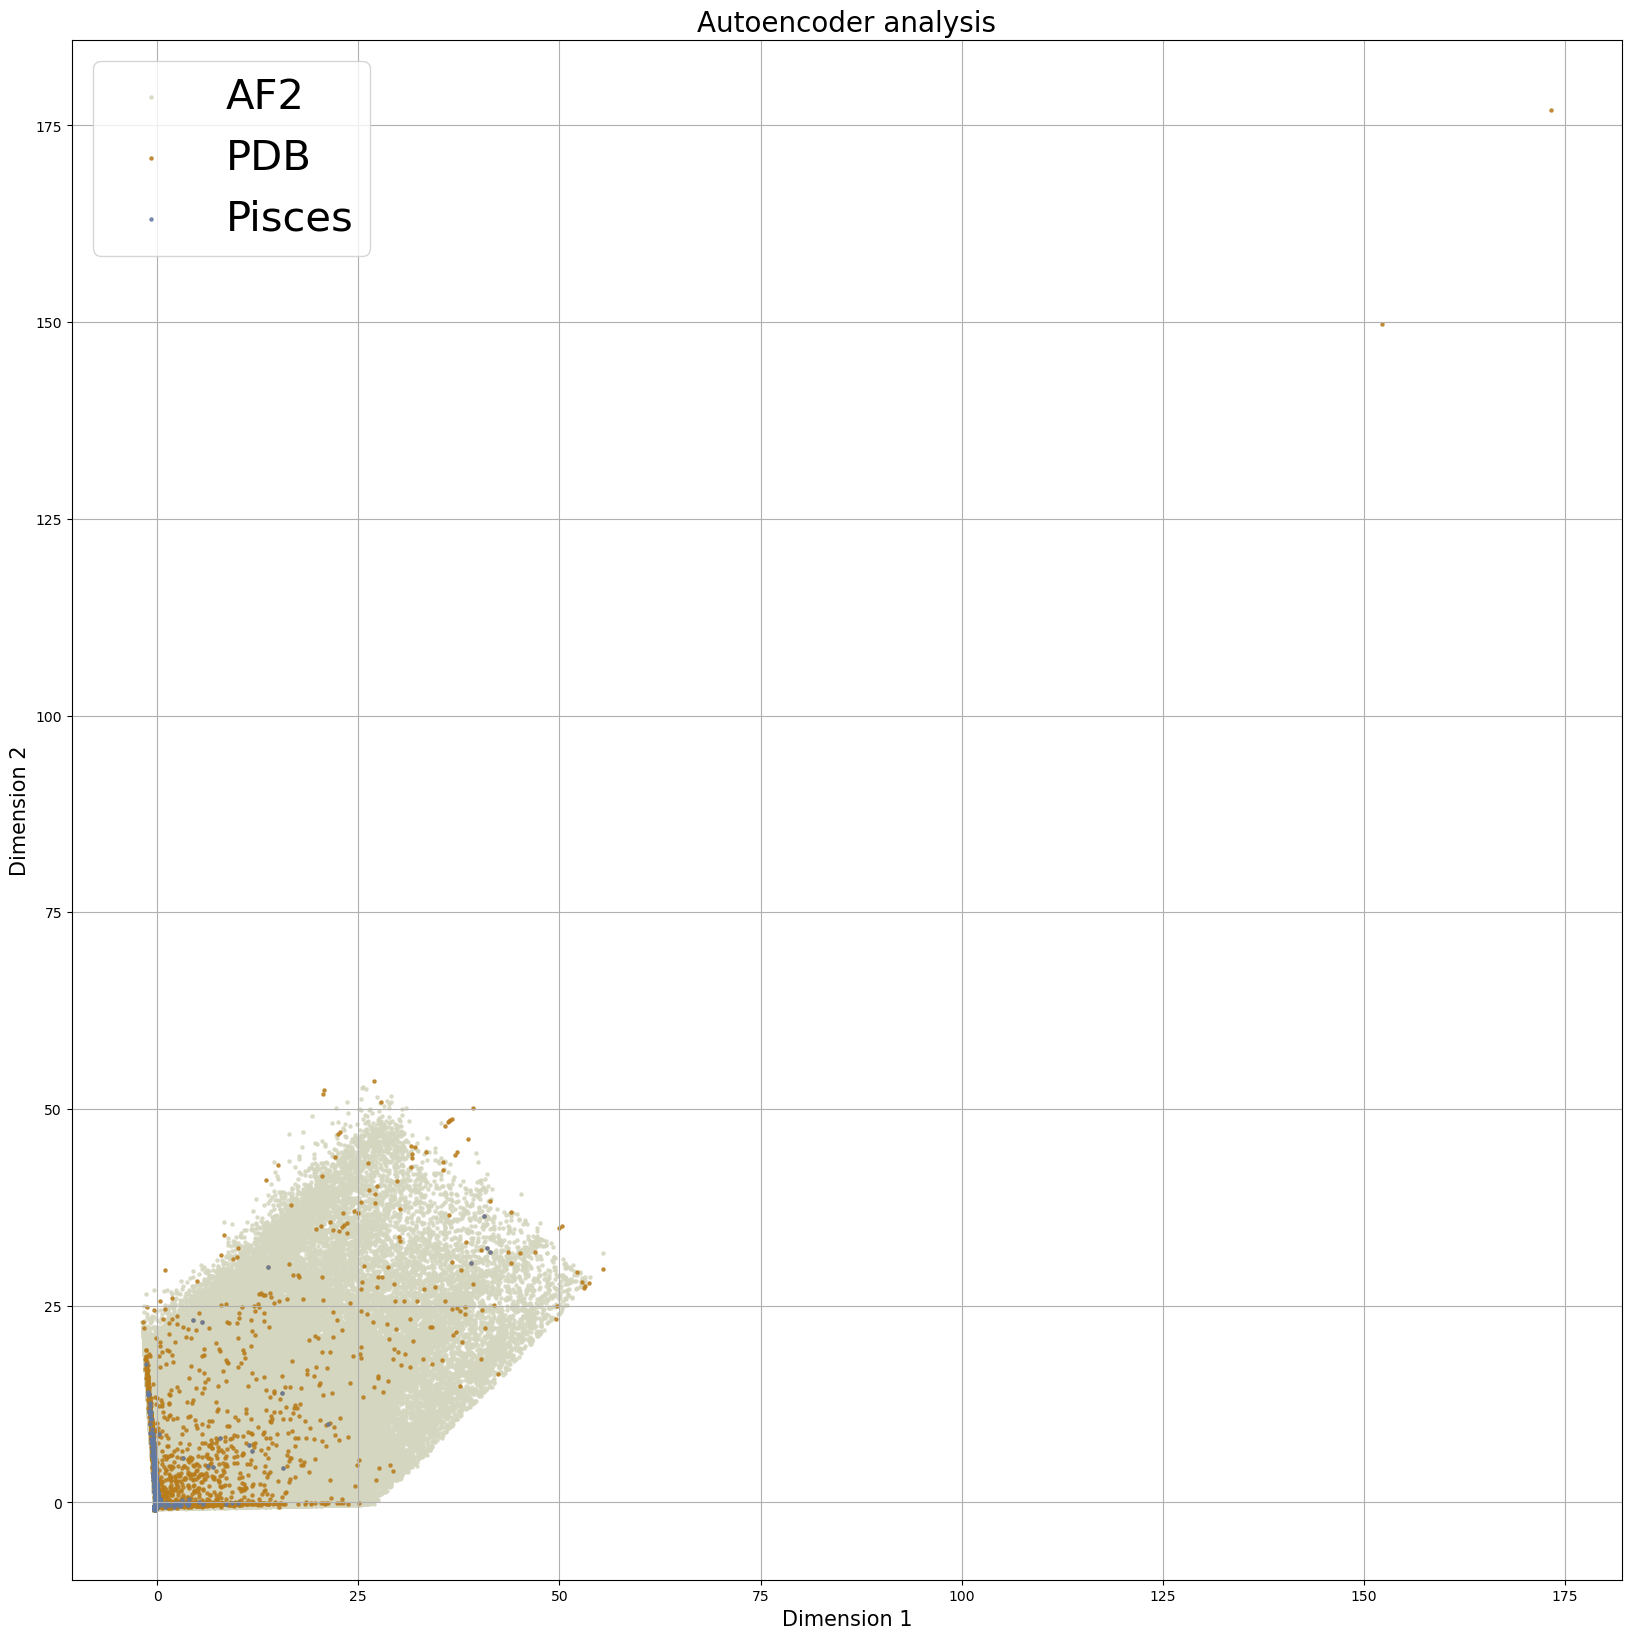

In [27]:
labels =wholedata.loc[:,['label_1','label_2']]
labels.reset_index(drop=True, inplace=True)
finalDf = pd.concat([reduced_df, labels], axis = 1)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('Autoencoder analysis', fontsize = 20)
#ax.set_xticks(np.arange(-50, 50, 1))
#ax.set_yticks(np.arange(-50, 50, 1))

targets = [ 'AF2','PDB', 'Pisces']
colors = [ '#D5D6BF', '#B87C1B','#6279A2']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['label_1'] == target) | (finalDf['label_2'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'dim1' ]
               , finalDf.loc[indicesToKeep, 'dim2']
               , c = color
               , s = 5
               , alpha=0.8)


ax.legend(targets,prop={'size': 30})
ax.grid()

In [19]:
fig.savefig("Autoencoder analysis.png", dpi=300)

Area finder

In [ ]:
wholedata_name = pd.read_csv('wholedata_with_name.csv',index_col=0) 
def areafinder(df, min_1, max_1, min_2, max_2):
    list_of_structures = []
    for index, row in df.iterrows():
        if min_1 < row[0] < max_1 and min_2 < row[1] < max_2:
            list_of_structures.append(index)

    list_of_uniprot_ids = []
    for item in list_of_structures:
        uniprot_id = uniprotidfinder(item)
        list_of_uniprot_ids.append(uniprot_id)

    return list_of_uniprot_ids
def uniprotidfinder(index):
    return wholedata_name.loc[index, 'UniProt_ID']

In [ ]:
area_1 =  areafinder (reduced_df,-0.3,-0.1,-0.1,0.1)
filtered_dataframe_area1 = wholedata_name[wholedata_name['UniProt_ID'].isin(area_1)]

In [ ]:
#area_2 
filtered_df_area2 = reduced_df[(reduced_df['dim1'] > 5) & (reduced_df['dim2'] > 4)]
sorted_df = filtered_df_area2.sort_values(by='dim1', ascending=False)

print(sorted_df)


In [ ]:
wholedata_name.iloc[545719]

In [ ]:
sampled_df_area1 = filtered_dataframe_area1.sample(n=10, random_state=42)
print(sampled_df_area1)
